In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Data/train'
valid_path = 'Data/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('Data/train/*')

In [7]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
                rescale=1./255,rotation_range=40,                ##rotation randomly between 40 and -40
     width_shift_range=0.2,
    height_shift_range=0.2,                           ##20% of total height and width will change randomly from 0 to 20%
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1398 images belonging to 2 classes.


In [13]:

test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 384 images belonging to 2 classes.


In [14]:
len(training_set)

44

In [15]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 44 steps, validate for 12 steps
Epoch 1/20
44/44 [==============================] - 26s 595ms/step - loss: 2.7598 - accuracy: 0.7690 - val_loss: 7.8629 - val_accuracy: 0.4870
Epoch 2/20
44/44 [==============================] - 22s 509ms/step - loss: 1.8624 - accuracy: 0.8476 - val_loss: 7.8682 - val_accuracy: 0.4870
Epoch 3/20
44/44 [==============================] - 24s 538ms/step - loss: 1.8314 - accuracy: 0.8562 - val_loss: 7.8682 - val_accuracy: 0.4870
Epoch 4/20
44/44 [==============================] - 25s 573ms/step - loss: 2.0800 - accuracy: 0.8455 - val_loss: 7.8682 - val_accuracy: 0.4870
Epoch 5/20
44/44 [==============================] - 26s 588ms/step - loss: 1.6512 - accuracy: 0.8755 - val_loss: 7.8682 - val_accuracy: 0.4870
Epoch 6/20
44/44 [==============================] - 30s 680ms/step - loss: 1.7199 - accuracy: 0.8734 - val_loss: 7.86

In [16]:
import matplotlib.pyplot as plt

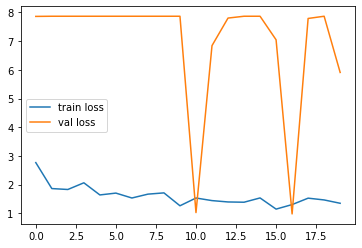

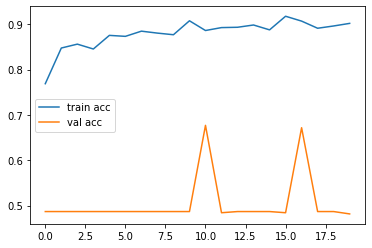

<Figure size 432x288 with 0 Axes>

In [17]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[9.87268686e-01, 3.48174058e-15, 9.75863574e-12, 1.27312643e-02],
       [9.66296434e-01, 4.49993982e-16, 1.26406793e-11, 3.37035619e-02],
       [7.57862488e-03, 7.00942263e-18, 6.41721658e-12, 9.92421329e-01],
       [8.15562725e-01, 1.94438650e-16, 3.22294903e-12, 1.84437260e-01],
       [6.85553551e-01, 3.68077532e-16, 1.57513134e-11, 3.14446479e-01],
       [9.70904827e-01, 1.09385612e-15, 8.86070124e-12, 2.90951394e-02],
       [8.90578687e-01, 1.58761598e-15, 6.67729370e-12, 1.09421350e-01],
       [5.89829087e-01, 1.13265701e-15, 1.05615384e-10, 4.10170883e-01],
       [3.66532966e-03, 1.37524192e-19, 8.91170557e-12, 9.96334672e-01],
       [1.62735432e-01, 1.68628775e-17, 6.69480183e-12, 8.37264538e-01],
       [9.86856520e-01, 9.73504390e-16, 6.56254434e-12, 1.31434677e-02],
       [8.75811279e-01, 7.38252900e-16, 2.61433566e-11, 1.24188669e-01],
       [7.36990988e-01, 2.03888229e-16, 2.13092374e-11, 2.63008982e-01],
       [9.61256862e-01, 2.79004352e-15, 1.91370166e

In [20]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
model.save('model_resnet.h5')

In [22]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [25]:
test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.
